# Random asset exchange model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

A formula for Gini coefficient ( https://en.wikipedia.org/wiki/Gini_coefficient )

$\displaystyle G(S)=1-{\frac {2}{n-1}}\left(n-{\frac {\sum _{i=1}^{n}iy_{i}}{\sum _{i=1}^{n}y_{i}}}\right).$

In [2]:
# Define a function to calculate Gini coefficient
def gini(x):
    y = np.sort(x) # We need to sort them by wealth
    upper_sum = 0
    n = len(x)
    for i in range(n):
        upper_sum += (i+1)*y[i]
    return 1-2/(n-1)*( n - upper_sum/sum(y) )

# Testing the function:    
print('This should be 0:',gini([1,1,1,1]))
print('This should be 1:',gini([1,0,0,0]))
print('This should be something else:',gini([10,5,1,1]))

This should be 0: 0.0
This should be 1: 1.0
This should be something else: 0.6078431372549019


### How to save values in a loop 

Below, we'll need to remember the values of tax_rate we tried. As we'll need them for the x-axis. How to do that?

3 options we have!

1. Pre-create an array of all possible values, and iterate through them.
2. Pre-allocate some space, fill it with zeros or something, and write values there as you go
3. Create an empty array `a = np.array([])`, then append values to it using `a = np.append(a,new_value)`.

### How to organize loops

If we need a certain parameter (p) to take values from a certain set of possible parameters (possible_ps) we'll need a loop, and we have 2 options when organizing it:

**Option 1:** make p go through values from possible_ps as you define the loop, and count how many times you went through the loop manually.

```python
counter = 0
for p in possible_ps:
    # stuff happens here
    counter += 1
```

**Option 2:** Make a loop count the number of runs, and set p manually. Kind of the opposite of Option 1.

```python
for counter in range(len(possible_ps)):
    p = possible_ps[counter]
```

Pick whichever looks and feels better (simpler, easier not to make a mistake with).

In [38]:
np.arange(0, 0.16, 0.01)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15])

Text(0, 0.5, 'Final Gini index')

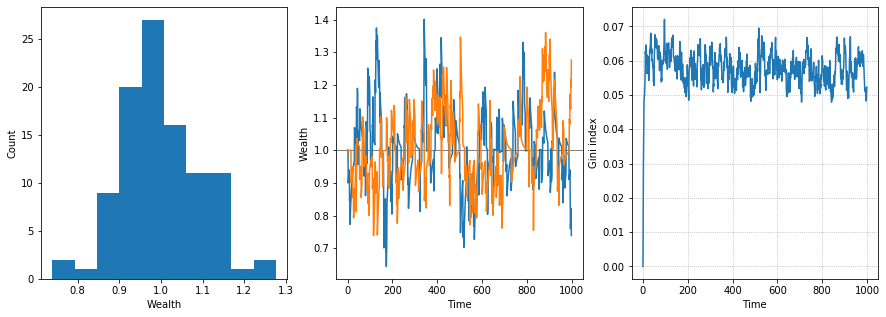

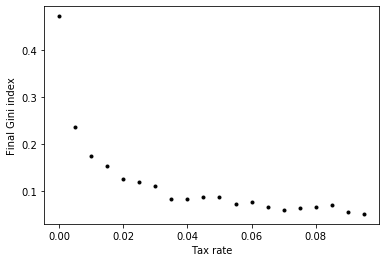

In [45]:
# Remember everything, plot the history.

nsteps = 1000
trades_per_step = 10
npeople = 100
coin = 0.1
interest = 0.000
taxrate = 0.01

wealth = np.ones(shape=(nsteps,npeople))
gini_history = np.zeros(nsteps)
taxrates = np.arange(start=0, stop=0.1, step=0.005)
final_gini = np.zeros(shape=taxrates.shape)


for itax in range(len(taxrates)):
    taxrate = taxrates[itax]
    for t in range(1,nsteps):                             # We now start at t=1, to be able to refer to t-1 (prev step)
        wealth[t,:] = wealth[t-1,:]*(1+interest)          # By default, wealth at t remains the same as it was at t-1

        tax = np.sum(wealth[t,:])*taxrate     # Total tax collected
        wealth[t,:] = wealth[t,:]*(1-taxrate) # Reduce by the amount collected
        wealth[t,:] += tax/npeople    

        for i in range(trades_per_step):                  # Let's make more than 2 ppl trade at each time point.
            p1 = np.random.randint(low=0, high=npeople)   # (It doesn't change the end solution, just makes plots prettier.
            p2 = np.random.randint(low=0, high=npeople)   # It's equivalent to only remembering eath Kth step.)
            if wealth[t,p1]>0:
                wealth[t,p1] -= coin        # Still update in place
                wealth[t,p2] += coin
        gini_history[t] = gini(wealth[t,:]) # Calculate gini index for the current distribution of wealth
    
    final_gini[itax] = gini_history[-1]


# Figures
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(wealth[-1,:],bins=10);
plt.xlabel('Wealth');
plt.ylabel('Count');

plt.subplot(1,3,2);
plt.axhline(1,color='gray',linewidth=1) # Horizontal line for original wealth
poor_one = np.argmin(wealth[-1,:])
rich_one = np.argmax(wealth[-1,:])
plt.plot(wealth[:,poor_one]);
plt.plot(wealth[:,rich_one]);
# plt.hlines(1, 0, nsteps); # Nope, we don't like it
plt.xlabel('Time');
plt.ylabel('Wealth');

plt.subplot(1,3,3)
plt.plot(gini_history);
plt.xlabel('Time');
plt.ylabel('Gini index');
plt.grid(linestyle=':');

# ---------- Second figure
plt.figure();
plt.plot(taxrates, final_gini, 'k.');
plt.xlabel('Tax rate');
plt.ylabel('Final Gini index')